In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [2]:
data1 = pd.read_csv('[Track1_데이터3] samp_cst_feat.csv',encoding = 'euc-kr')
data2 = pd.read_csv('[Track1_데이터2] samp_train.csv',encoding = 'euc-kr')
data1["MRC_ID_DI"] = data2["MRC_ID_DI"]

In [3]:
data1["MRC_ID_DI"] = data2["MRC_ID_DI"]

In [4]:
categories = ['VAR007','VAR015','VAR018','VAR026','VAR059',
              'VAR066','VAR067','VAR070','VAR077','VAR078',
              'VAR094','VAR096','VAR097','VAR098','VAR107',
              'VAR111','VAR124','VAR127','VAR143','VAR144',
              'VAR145','VAR148','VAR165','VAR177','VAR179',
              'VAR199','VAR208',"MRC_ID_DI"]

In [5]:
data1[categories] = data1[categories].astype("int64")

In [6]:
data1.groupby(["MRC_ID_DI"]).size()

MRC_ID_DI
0     8200
1       85
2       14
3       32
4       11
5      143
6      554
7      661
8      337
9       59
10      28
dtype: int64

#### 온라인 마켓 사용, 미사용으로 분류

In [7]:
data1["MRC_ID_DI"] = data1["MRC_ID_DI"].replace(range(1,11),1)

In [8]:
data1 = data1.drop(['cst_id_di'],axis = 1)

In [9]:
samsung = sm.add_constant(data1, has_constant = 'add')
samsung.head()

,const,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
0,1.0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,1.0,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,1
2,1.0,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0
3,1.0,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,1
4,1.0,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,1


In [10]:
feature_columns = list(samsung.columns.difference(["MRC_ID_DI"]))
X = samsung[feature_columns]
y = samsung["MRC_ID_DI"]
print(y)

0        0
1        1
2        0
3        1
4        1
        ..
10119    1
10120    0
10121    0
10122    0
10123    0
Name: MRC_ID_DI, Length: 10124, dtype: int64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   train_size = 0.7, test_size = 0.3,
                                                   random_state = 100) #set_seed
print("x_train.shape = {}, x_test.shape = {}, y_train.shape = {}, y_test.shape = {}".format(x_train.shape, x_test.shape,
                                                                                            y_train.shape, y_test.shape))

x_train.shape = (7086, 227), x_test.shape = (3038, 227), y_train.shape = (7086,), y_test.shape = (3038,)


In [12]:
model = sm.Logit(y_train, x_train)
results = model.fit(method = "newton")

         Current function value: 0.291643
         Iterations: 35


c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              MRC_ID_DI   No. Observations:                 7086
Model:                          Logit   Df Residuals:                     6861
Method:                           MLE   Df Model:                          224
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:                  0.4009
Time:                        23:57:39   Log-Likelihood:                -2066.6
converged:                      False   LL-Null:                       -3449.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
VAR002         0.9805      0.863      1.136      0.256      -0.711       2.672
VAR003        -1.3099      0.255     -5.133      0.000      -1.810      -0.810
VAR004        -6.8278      4.186     -1.631      0.103     -15.032       1.377
VAR005        -0.5489      0.793     -0.692      0.489      -2.103       1.005
VAR006        -6.0795      4.581     -1.327      0.184     -15.059       2.899
VAR007        -4.1644        nan        nan        nan         nan         nan
VAR008         0.0314      0.145      0.216      0.829      -0.253       0.315
VAR009        10.7495      3.798      2.830      0.005       3.306      18.193
VAR010         0.4786      0.209      2.287      0.022       0.068       0.889
VAR011        21.3952      7.653      2.796      0.005       6.395      36.395
VAR012       -10.6301     12.677     -0.839      0.402     -35.476      14.216
VAR013        -9.6184      8.952     -1.074      0.283     -27.165       7.928
VAR014        11.8766     12.224      0.972      0.331     -12.081      35.834
VAR015        -0.0264      0.109     -0.243      0.808      -0.239       0.187
VAR016         0.4083      0.343      1.189      0.234      -0.265       1.081
VAR017        -0.3969      0.364     -1.089      0.276      -1.111       0.317
VAR018        -3.8054        nan        nan        nan         nan         nan
VAR019        -2.3234      2.360     -0.984      0.325      -6.949       2.302
VAR020        -0.1065      0.730     -0.146      0.884      -1.537       1.324
VAR021        -0.6516      3.108     -0.210      0.834      -6.744       5.441
VAR022        -9.1762      6.006     -1.528      0.127     -20.947       2.595
VAR023         0.5575      0.630      0.886      0.376      -0.676       1.791
VAR024       -23.9447      9.827     -2.437      0.015     -43.206      -4.683
VAR025         3.0605      2.837      1.079      0.281      -2.500       8.621
VAR026         0.3359      0.301      1.116      0.265      -0.254       0.926
VAR027        12.7854      6.842      1.869      0.062      -0.624      26.194
VAR028        -8.2900      8.727     -0.950      0.342     -25.394       8.814
VAR029        -3.3883      2.424     -1.398      0.162      -8.139       1.362
VAR030        -0.3684      0.684     -0.539      0.590      -1.709       0.972
VAR031         0.2546      0.216      1.179      0.238      -0.169       0.678
VAR032        21.5431     13.056      1.650      0.099      -4.046      47.132
VAR033         1.0529      0.771      1.366      0.172      -0.458       2.564
VAR034        -7.1137      3.553     -2.002      0.045     -14.078      -0.150
VAR035       -13.1516      4.729     -2.781      0.005     -22.420      -3.883
VAR036         0.1145      0.166      0.688      0.491      -0.212       0.441
VAR037        -4.8779      2.239     -2.179      0.029      -9.266      -0.490
VAR038        -6.9008      5.840     -1.182      0.237     -18.347       4.545
VAR039       -16.3386     12.215     -1.338      0.181     -40.280       7.603
VA

In [14]:
results.params

VAR002     0.980517
VAR003    -1.309911
VAR004    -6.827814
VAR005    -0.548888
VAR006    -6.079519
            ...    
VAR225     0.473799
VAR226     5.377448
VAR227     1.504665
const    -18.186383
var178    -0.244796
Length: 227, dtype: float64

In [15]:
np.exp(results.params)

VAR002    2.665835e+00
VAR003    2.698440e-01
VAR004    1.083223e-03
VAR005    5.775918e-01
VAR006    2.289277e-03
              ...     
VAR225    1.606084e+00
VAR226    2.164692e+02
VAR227    4.502644e+00
const     1.264020e-08
var178    7.828640e-01
Length: 227, dtype: float64

In [16]:
results.aic

4583.163643056004

In [17]:
y_pred = results.predict(x_test)
y_pred

9979    0.003627
8301    0.105099
61      0.034226
7445    0.251389
6053    0.146680
          ...   
7109    0.174107
3353    0.051505
1638    0.000974
2232    0.001769
3726    0.545691
Length: 3038, dtype: float64

In [18]:
def PRED(y, threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

Y_pred = PRED(y_pred,0.5)
Y_pred

9979    0
8301    0
61      0
7445    0
6053    0
       ..
7109    0
3353    0
1638    0
2232    0
3726    1
Length: 3038, dtype: int32

### 오분류표

In [19]:
cfmat = confusion_matrix(y_test, Y_pred)
def acc(cfmat) :
    acc = round((cfmat[0,0]+cfmat[1,1])/np.sum(cfmat),3)
    return(acc)
acc(cfmat) # accuracy == 0.863

0.863

In [20]:
pca = PCA(n_components = 10)
pca.fit(X)

PCA(n_components=10)

In [21]:
PCscore = pca.transform(X)
PCscore[:,0:5]

array([[ 1.61103191, -1.45895951, -0.44078694,  1.29724981,  1.17403704],
       [ 3.54174898,  1.15224818,  0.7469527 , -0.85289188, -0.40329333],
       [-3.78703665, -0.37374512, -0.21618028,  0.31804936, -0.61817319],
       ...,
       [-2.87352597, -0.84465271, -0.17578321,  0.26242906,  0.08292944],
       [-0.43867668,  1.0350786 , -0.55228081,  0.81873279,  0.47765846],
       [ 1.1862562 ,  1.43135874,  0.39301448,  1.11786852, -0.66617698]])

In [22]:
eigens_vector = pca.components_.transpose()
eigens_vector

array([[-0.00645011, -0.01336264, -0.00585211, ..., -0.00231741,
         0.00839386,  0.00209844],
       [-0.07538312, -0.00673262,  0.09174189, ...,  0.02052027,
        -0.05080887, -0.02225895],
       [-0.06162282,  0.01177409,  0.08814912, ...,  0.04172166,
        -0.03779308,  0.01155979],
       ...,
       [-0.06701067, -0.11211265, -0.05761715, ..., -0.00532823,
        -0.0143025 ,  0.01228668],
       [ 0.        ,  0.        , -0.        , ..., -0.        ,
         0.        ,  0.        ],
       [ 0.02302927, -0.00977995, -0.01282632, ...,  0.00451662,
        -0.00997172,  0.07577906]])

In [23]:
mX = np.matrix(X)

(mX * eigens_vector)[:, 0:5]

matrix([[ 7.51186718e-01, -1.11353314e+00, -1.18945931e+00,
          1.70116307e+00,  6.88935474e-01],
        [ 2.68190379e+00,  1.49767454e+00, -1.71966325e-03,
         -4.48978629e-01, -8.88394896e-01],
        [-4.64688184e+00, -2.83187550e-02, -9.64852644e-01,
          7.21962617e-01, -1.10327476e+00],
        ...,
        [-3.73337116e+00, -4.99226347e-01, -9.24455580e-01,
          6.66342309e-01, -4.02172130e-01],
        [-1.29852187e+00,  1.38050497e+00, -1.30095318e+00,
          1.22264605e+00, -7.44311111e-03],
        [ 3.26411008e-01,  1.77678510e+00, -3.55657889e-01,
          1.52178178e+00, -1.15127855e+00]])

[[ 1.61103191e+00 -1.45895951e+00 -4.40786943e-01 ...  8.52287762e-04
   1.89081785e-01 -6.40097046e-01]
 [ 3.54174898e+00  1.15224818e+00  7.46952702e-01 ... -2.68145965e-01
  -1.49428537e-01  2.65574438e-01]
 [-3.78703665e+00 -3.73745119e-01 -2.16180278e-01 ...  8.10442739e-01
   1.69611923e-01 -4.40500977e-01]
 ...
 [-2.87352597e+00 -8.44652710e-01 -1.75783214e-01 ...  6.53136636e-01
  -2.35177156e-02  1.15749831e-01]
 [-4.38676679e-01  1.03507860e+00 -5.52280811e-01 ... -8.07275377e-01
  -3.57757194e-01 -6.19247226e-01]
 [ 1.18625620e+00  1.43135874e+00  3.93014477e-01 ...  5.35498698e-02
   4.33353083e-01 -1.85729608e-01]]
[ 1.61103191  3.54174898 -3.78703665 ... -2.87352597 -0.43867668
  1.1862562 ]


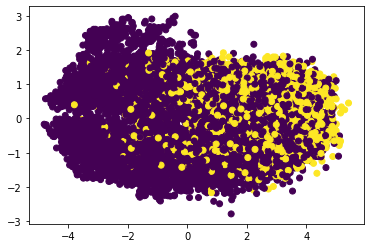

In [24]:
print(PCscore)
plt.scatter(PCscore[:, 0], PCscore[:, 1], c = y)
print(PCscore[:,0])
plt.show()

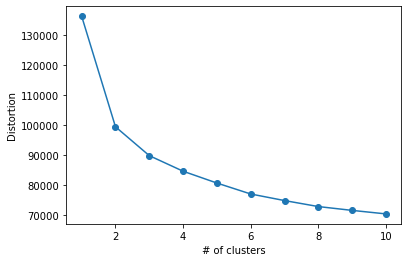

In [25]:
distortions = []

for i in range(1, 11) :
    km = KMeans(n_clusters = i, random_state = 102)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Distortion")
plt.show()

In [26]:
lr_clf = LogisticRegression(max_iter = 10000)
lr_clf.fit(x_train, y_train)

pred_lr = lr_clf.predict(x_test)
print(accuracy_score(y_test, pred_lr))
print(mean_squared_error(y_test, pred_lr))

0.8610928242264648
0.13890717577353523


In [27]:
bag_clf = BaggingClassifier(base_estimator = lr_clf,
                           n_estimators = 5,
                           verbose = 1)
lr_clf_bag = bag_clf.fit(x_train, y_train)
pred_lr_bag = lr_clf_bag.predict(x_test)
pred_lr_bag

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print(accuracy_score(y_test, pred_lr_bag))
print(mean_squared_error(y_test, pred_lr_bag))

0.8554970375246873
0.14450296247531272


In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred_dt = dt_clf.predict(x_test)

print(accuracy_score(y_test, pred_dt))
print(mean_squared_error(y_test, pred_dt))

0.7643186306780777
0.23568136932192232


In [30]:
rf_clf = RandomForestClassifier(n_estimators = 5, 
                                max_depth = 3,
                               random_state = 103, 
                               verbose = 1)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test, pred))

0.8209348255431205


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [31]:
rf_clf = RandomForestClassifier(n_estimators = 500, 
                                max_depth = 3,
                               random_state = 103, 
                               verbose = 1)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test, pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


0.815668202764977


In [32]:
rf_clf = RandomForestClassifier(n_estimators = 500, 
                                max_depth = 10,
                               random_state = 103, 
                               verbose = 1)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test, pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   30.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8423304805793285


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [33]:
rf_clf4 = RandomForestClassifier()

In [34]:
params = { 'n_estimators' : [10, 100, 500, 1000],
           'max_depth' : [3, 5, 10, 15]}

rf_clf4 = RandomForestClassifier(random_state = 103, 
                                n_jobs = -1,
                                verbose = 1)
grid_cv = GridSearchCV(rf_clf4,
                      param_grid = params,
                      n_jobs = -1,
                      verbose = 1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   12.0s


최적 하이퍼 파라미터:  {'max_depth': 10, 'n_estimators': 1000}
최고 예측 정확도: 0.8281


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.2s finished


In [35]:
test_acc = []

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    test_acc.append(accuracy_score(y_test, y_pred))
    
    print("k : {}, 정확도 : {}".format(n, accuracy_score(y_test, y_pred)))

k : 1, 정확도 : 0.7662936142198815
k : 2, 정확도 : 0.8064516129032258
k : 3, 정확도 : 0.7942725477287689
k : 4, 정확도 : 0.8117182356813694
k : 5, 정확도 : 0.8110599078341014
k : 6, 정확도 : 0.8252139565503621
k : 7, 정확도 : 0.8271889400921659
k : 8, 정확도 : 0.8304805793285056
k : 9, 정확도 : 0.8294930875576036
k : 10, 정확도 : 0.8334430546412114


In [36]:
test_acc

[0.7662936142198815,
 0.8064516129032258,
 0.7942725477287689,
 0.8117182356813694,
 0.8110599078341014,
 0.8252139565503621,
 0.8271889400921659,
 0.8304805793285056,
 0.8294930875576036,
 0.8334430546412114]

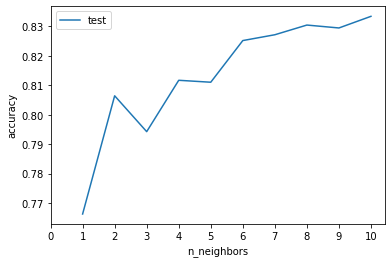

In [37]:
plt.figure()
plt.plot(range(1, 11), test_acc, label = 'test')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 11, step = 1))
plt.legend()
plt.show()

In [38]:
clf_lin = svm.LinearSVC()
clf_lin.fit(x_train, y_train)

y_pred_lin = clf_lin.predict(x_test)

print(confusion_matrix(y_test, y_pred_lin))
print(accuracy_score(y_test, y_pred_lin))

[[2333  130]
 [ 280  295]]
0.8650427913100724


#### 0(미사용), 1,6,8 Group shaping

In [54]:
group0, group1 = data1[data1["MRC_ID_DI"]==0], data1[data1["MRC_ID_DI"]==1]
group6, group8 = data1[data1["MRC_ID_DI"]==6], data1[data1["MRC_ID_DI"]==8]

In [55]:
print("group0.shape = {}, group1.shape = {}, group6.shape = {}, group8.shape = {}".format(group0.shape, group1.shape,
                                                                                          group6.shape, group8.shape))

group0.shape = (8200, 227), group1.shape = (1924, 227), group6.shape = (0, 227), group8.shape = (0, 227)


In [56]:
group0, group1, group6, group8 = pd.get_dummies(group0), pd.get_dummies(group1), pd.get_dummies(group6), pd.get_dummies(group8)

#### Dummy 변수 생성, group by shape

In [57]:
print("group0.shape = {}, group1.shape = {}, group6.shape = {}, group8.shape = {}".format(group0.shape, group1.shape,
                                                                                          group6.shape, group8.shape))

group0.shape = (8200, 227), group1.shape = (1924, 227), group6.shape = (0, 227), group8.shape = (0, 227)


In [63]:
group0 = group0.T.drop(["MRC_ID_DI"]).T
group0.index = range(1,len(group0)+1)
group0

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
1,-0.06610,0.5280,-0.13607,0.10945,0.06557,0.0,0.7702,-0.18965,0.1981,0.24149,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
2,-0.01048,0.8360,0.37797,-0.10970,0.52032,1.0,0.3257,0.32632,0.7343,0.73494,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,-0.10778,0.0810,-0.12917,0.06835,-0.40939,0.0,0.7128,-0.13009,0.7291,-0.39929,...,-0.42328,0.27452,0.04098,0.06074,0.49646,-0.02204,-0.06996,0.01552,0.20518,-0.09952
4,0.02596,0.2279,0.09658,-0.21836,0.47897,0.0,0.1961,0.39811,0.2458,0.45440,...,0.48697,-0.44143,-0.15050,-0.19061,-0.52859,-0.19092,-0.03939,-0.11918,-0.29188,0.21474
5,0.03735,0.3486,-0.07106,0.05682,0.51936,1.0,0.6283,-0.11848,0.2781,0.20183,...,0.07424,0.12450,0.09082,0.03790,-0.01301,0.11605,0.41329,0.01658,-0.13191,0.10532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8196,-0.00925,0.7706,0.25466,-0.19329,0.43215,1.0,0.6892,0.44652,0.3488,0.68210,...,0.52560,-0.42943,-0.13345,-0.16509,-0.57853,-0.16135,-0.09230,-0.05164,-0.14484,0.26366
8197,-0.03031,0.0143,0.07041,-0.02519,0.58013,0.0,0.0330,0.06676,0.8251,0.68992,...,0.09259,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301
8198,-0.05351,0.3121,0.36925,-0.10039,0.51159,0.0,0.2582,0.35016,0.4638,0.68799,...,0.46478,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357
8199,-0.00562,0.2286,0.04581,-0.05390,0.20481,0.0,0.5957,0.11319,0.2527,0.42924,...,0.10340,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931


In [64]:
group0.corr(method = 'pearson')

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
VAR002,1.000000,0.044652,0.004806,-0.060189,0.208932,0.053711,-0.062780,0.029872,-0.085507,0.200439,...,0.084411,-0.136724,-0.004800,-0.058497,-0.092455,0.030105,0.550813,-0.024995,-0.178461,0.219723
VAR003,0.044652,1.000000,0.497817,-0.497156,0.285902,0.158203,0.156713,0.533279,-0.314611,0.310501,...,0.604738,-0.612976,-0.493747,-0.488877,-0.627271,-0.461673,-0.282664,-0.451801,-0.497987,0.275413
VAR004,0.004806,0.497817,1.000000,-0.790784,0.298176,0.123244,0.131683,0.916816,-0.389185,0.382857,...,0.833252,-0.822089,-0.848843,-0.785641,-0.798878,-0.786375,-0.502426,-0.779706,-0.676380,0.260673
VAR005,-0.060189,-0.497156,-0.790784,1.000000,-0.358032,-0.184772,-0.091354,-0.898056,0.416773,-0.368503,...,-0.789746,0.773611,0.799385,0.900307,0.787250,0.802329,0.491947,0.664555,0.660575,-0.260098
VAR006,0.208932,0.285902,0.298176,-0.358032,1.000000,0.290835,-0.059105,0.323057,-0.343731,0.825295,...,0.531624,-0.551147,-0.299156,-0.355602,-0.552869,-0.261564,-0.041771,-0.208996,-0.668634,0.751368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAR223,0.030105,-0.461673,-0.786375,0.802329,-0.261564,-0.153139,-0.105344,-0.867366,0.387216,-0.326644,...,-0.732189,0.728193,0.863036,0.802136,0.731038,1.000000,0.524589,0.689995,0.595481,-0.226644
VAR224,0.550813,-0.282664,-0.502426,0.491947,-0.041771,-0.059475,-0.100285,-0.536840,0.179094,-0.074258,...,-0.426935,0.387839,0.506185,0.483680,0.411702,0.524589,1.000000,0.419642,0.270269,0.007621
VAR225,-0.024995,-0.451801,-0.779706,0.664555,-0.208996,-0.117839,-0.103074,-0.788530,0.335033,-0.299018,...,-0.695901,0.701578,0.742462,0.653979,0.689645,0.689995,0.419642,1.000000,0.553872,-0.171753
VAR226,-0.178461,-0.497987,-0.676380,0.660575,-0.668634,-0.210434,0.009782,-0.687481,0.586247,-0.578276,...,-0.858024,0.891394,0.640163,0.657191,0.849384,0.595481,0.270269,0.553872,1.000000,-0.524745


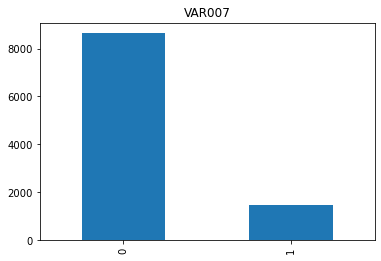

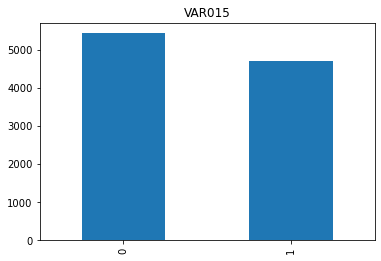

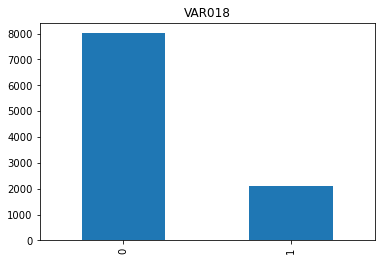

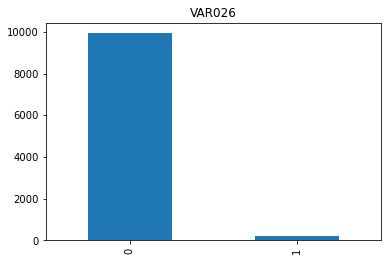

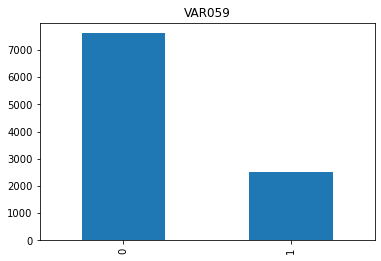

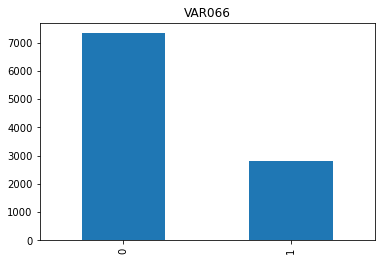

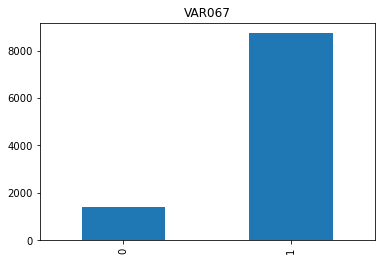

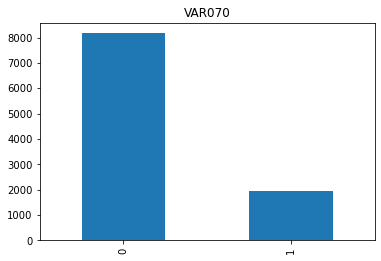

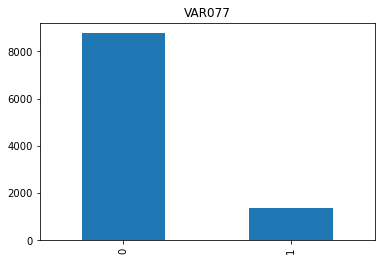

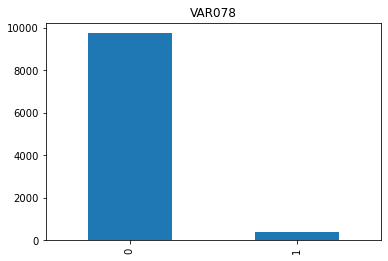

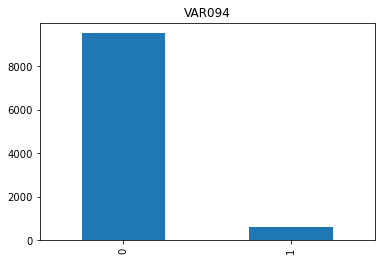

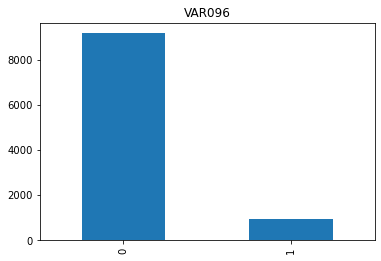

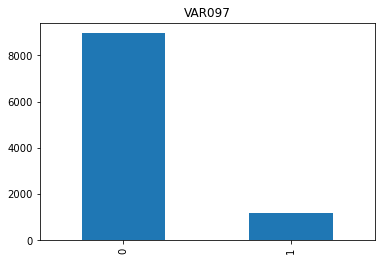

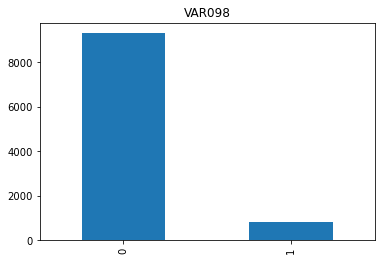

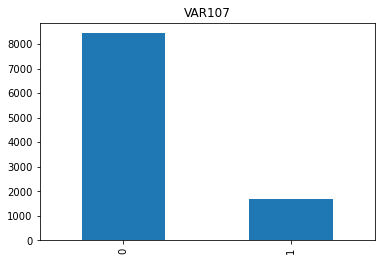

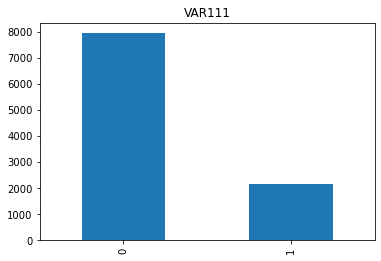

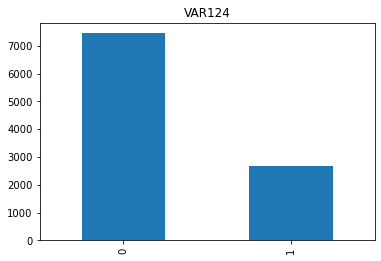

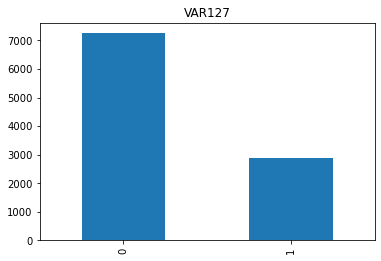

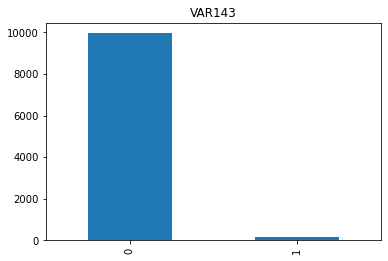

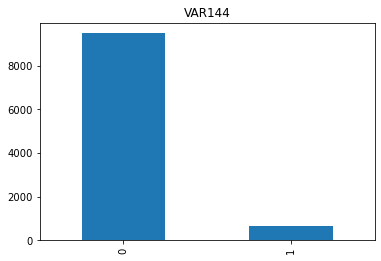

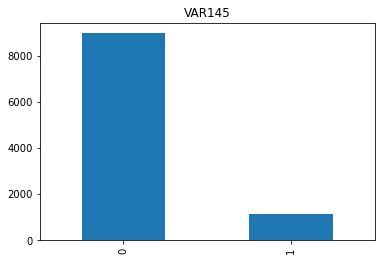

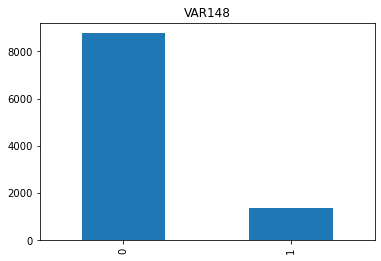

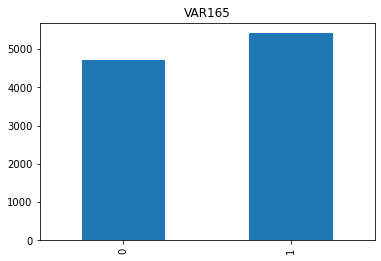

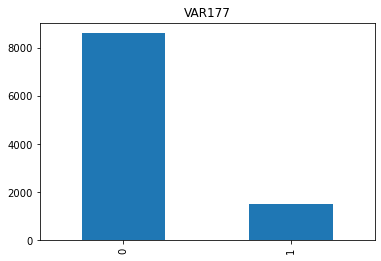

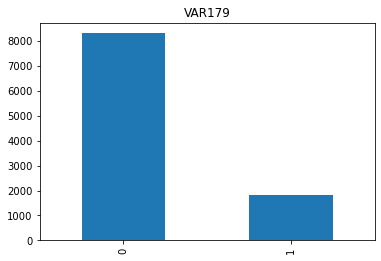

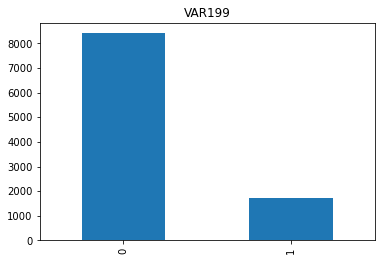

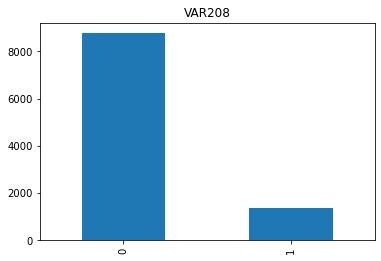

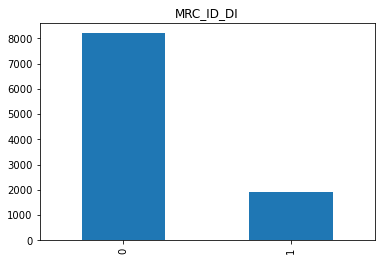

In [65]:
for a in categories:
    data1[a].value_counts().plot(kind= 'bar')
    plt.title(a)
    plt.show()